# Cardiovascular Disease dataset

* Objetivos: criar uma ferramenta que aumente a precisão do diagnóstico e que essa precisão seja estável para todos os diagnósticos.


* Enviar um relatório para o CEO da Cardio Catch Diseases, reportando os resultados e respondendo às seguintes perguntas:
    * Qual a Acurácia e a Precisão da ferramenta?
    * Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?
    * Qual a Confiabilidade do resultado dados pela nova ferramenta?
    
    
* Primeiramente, esses dados serão limpos e explorados, para que possa haver uma melhor compreensão do dataset. Em seguida, serão aplicadas as ferramentas de machine learning.


* Fonte: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Abrindo o dataset

In [1]:
#Importando bibliotcas
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
#Abrindo o dataset
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Definindo a coluna 'id' como índice
df.set_index('id', inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Algumas transformações serão necessárias para facilitar a visualização dos dados
df['age'] //= 356  # Converte a idade de dias para ano
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,49,1,156,56.0,100,60,1,1,0,0,0,0


### Descrição dos dados

* Existem 3 tipos de recursos de entrada:


* Objetivo: informações factuais;
* Exame: resultados de exames médicos;
* Subjetivo: informações fornecidas pelo paciente.


* Features:

* Age | Objective Feature | age | int (years)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0: No cardiac disease, 1: Cardiac disease


* All of the dataset values were collected at the moment of medical examination.

## Analisando os dados

#### Resumo sobre o dataset

In [5]:
#Verificando se há valores nulos
pd.DataFrame(df.isna().sum()).T

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0,0,0,0,0,0,0,0,0,0


* Não há, o que é um ótimo sinal

In [6]:
#Resumo das informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [7]:
#Resumo estatístico do dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,54.188529,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.936058,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,66.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Retirando valores duplicados

In [8]:
df = df.drop_duplicates()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,49,1,156,56.0,100,60,1,1,0,0,0,0


#### Tratando os outliers

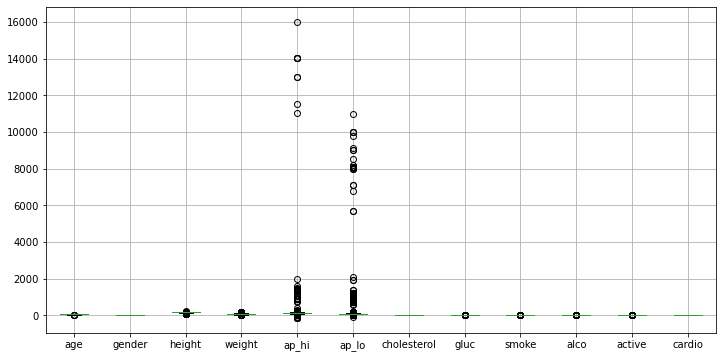

In [9]:
plt.figure(figsize=(12,6))
df.boxplot()
print()

In [10]:
#Os outliers serão identificados e tratados pelo método IQR score
# Q1 = Primeiro quartil
# Q3 = Terceiro quartil

# Q1 é o tempo associado à primeira probabilidade de sobrevivência na tabela menor que ou igual a 0,75.
# Q3 é o tempo associado à primeira probabilidade de sobrevivência na tabela menor que ou igual a 0,25.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

age            10.0
gender          1.0
height         11.0
weight         18.0
ap_hi          20.0
ap_lo          10.0
cholesterol     1.0
gluc            0.0
smoke           0.0
alco            0.0
active          0.0
cardio          1.0
dtype: float64

In [11]:
#São 72 outliers
IQR.sum()

72.0

* Importante observar que as features binárias (aqueles só tem 1 e 0 como opções), como smoke (se é fumante ou não), alco (se bebe bebidas alcoólicas ou não) e active (se pratica exercícios físicos ou não), não é necessário passar pelo crivo do tratamento de outliers, porque em nenhuma delas há valores outliers, como mostra a tabela acima.


* Gender (gênero), cholesterol (nível de colesterol), gluc (nível de glicose) e cardio (possui ou não alguma doença cardíaca) também não são necessários, pelo menos nesse momento. 


* Os outilers das variáveis que realmente interessam, que são:
    * height         11.0
    * weight         18.0
    * ap_hi          20.0
    * ap_lo          10.0

In [12]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print('\n')
print(upper_limit)

age             34.0
gender          -0.5
height         142.5
weight          38.0
ap_hi           90.0
ap_lo           65.0
cholesterol     -0.5
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio          -1.5
dtype: float64


age             74.0
gender           3.5
height         186.5
weight         110.0
ap_hi          170.0
ap_lo          105.0
cholesterol      3.5
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           2.5
dtype: float64


In [13]:
#Removendo outliers de height e weight
df = df[(df['height']<210) & (df['weight']>38.0)]
df.shape

(66382, 12)

In [14]:
# Removendo outliers em ap_hi and ap_lo
df= df[(df['ap_lo']<360) & (df['ap_hi']<360)].copy()
df= df[(df['ap_lo']>20) & (df['ap_hi']>20)].copy()
df=df[df['ap_hi']>df['ap_lo']]
df.shape

(65065, 12)

In [15]:
# Removendo os outliers em age
df = df[(df['age']>30)]
df.shape

(65061, 12)

In [16]:
#Removendo pesos e alturas abaixo de 2,5% ou acima de 97,5% de uma determinada faixa.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.shape

(59250, 12)

#### Salvando os dados

In [17]:
#Salvando o dataset após a limpeza dos dados
df.to_csv('cardio_data.csv')

#### Correlação entre os dados

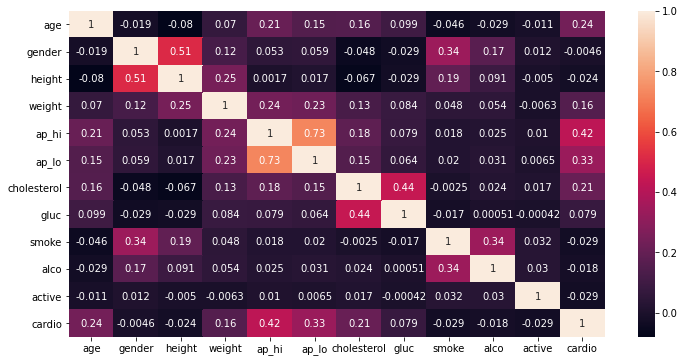

In [18]:
# Gráfico de correlação
plt.figure(figsize=(12,6))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
print()

In [19]:
#Correlações com a variável alvo(target)
correlations = df.corr()['cardio'].drop('cardio')
correlations.sort_values()

smoke         -0.028864
active        -0.028538
height        -0.024408
alco          -0.018212
gender        -0.004606
gluc           0.078839
weight         0.159917
cholesterol    0.210342
age            0.236914
ap_lo          0.334084
ap_hi          0.423659
Name: cardio, dtype: float64

In [20]:
#Antes de começar a fazer a levantar hipóteses, seria interessante montar um dicionário, 
#com o intuito de identificar melhor algumas features.

df['cholesterol']=df['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gender']=df['gender'].map({ 1: 'M', 2: 'F'})
df['smoke']=df['smoke'].map({ 0: 'No', 1: 'Yes'})
df['alco']=df['alco'].map({ 0: 'No', 1: 'Yes'})
df['active']=df['active'].map({ 0: 'No', 1: 'Yes'})

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,F,168,62.0,110,80,normal,normal,No,No,Yes,0
1,56,M,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,52,M,165,64.0,130,70,well above normal,normal,No,No,No,1
3,49,F,169,82.0,150,100,normal,normal,No,No,Yes,1
4,49,M,156,56.0,100,60,normal,normal,No,No,No,0


In [21]:
df.shape

(59250, 12)

## Hipóteses

* 1 - Todos os pacientes com alguma doença cardíaca fumam.
* 2 - Quanto maior a idade, mais é a chance da pessoa desenvolver doenças cardíacas?
* 3 - 30% dos pacientes acima de 65 anos possuem colesterol acima do normal.
* 4 - Todos os pacientes com pressões sistólica e diastólica normais não possuem doença cardíaca.
* 5 - Pessoas que praticam exercícios não possuem doenças cardíacas.

### 1 - Todos os pacientes com alguma doença cardíaca fumam

**Falso**. Muitos pacientes que têm alguma doença cardíaca não fumam. Eles correspondem a 91,72%. Fumar é um dos fatores, e não o único a causar doenças cardíacas.

In [22]:
#Todos os pacientes com doenças cardíacas
df.query('cardio == 1')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
1,56,M,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,52,M,165,64.0,130,70,well above normal,normal,No,No,No,1
3,49,F,169,82.0,150,100,normal,normal,No,No,Yes,1
12,63,F,178,95.0,130,90,well above normal,well above normal,No,No,Yes,1
32,64,M,158,90.0,145,85,above normal,above normal,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99986,42,M,168,72.0,110,70,normal,normal,No,No,Yes,1
99990,52,M,161,56.0,170,90,normal,normal,No,No,Yes,1
99991,55,M,172,70.0,130,90,normal,normal,No,No,Yes,1


In [23]:
#Quantos fumam e quantos não fumam
smoke = df.query('cardio == 1')['smoke'].value_counts()
smoke

No     27595
Yes     2490
Name: smoke, dtype: int64

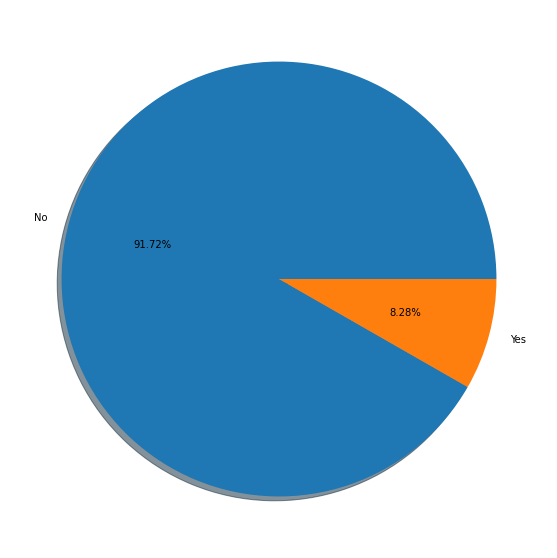

In [24]:
plt.figure(figsize=(14,10))
plt.pie(smoke, labels=['No', 'Yes'], autopct='%1.2f%%', shadow=True);

## 2 - Quanto maior a idade, mais é a chance da pessoa desenvolver doenças cardíacas?

**Falso**. De acordo com os dados apresentados, não há uma correlação direta entre idade e doença cardíaca. Pessoas mais novas podem ter doenças cardíacas, assim como as mais velhas podem não ter doenças cardíacas

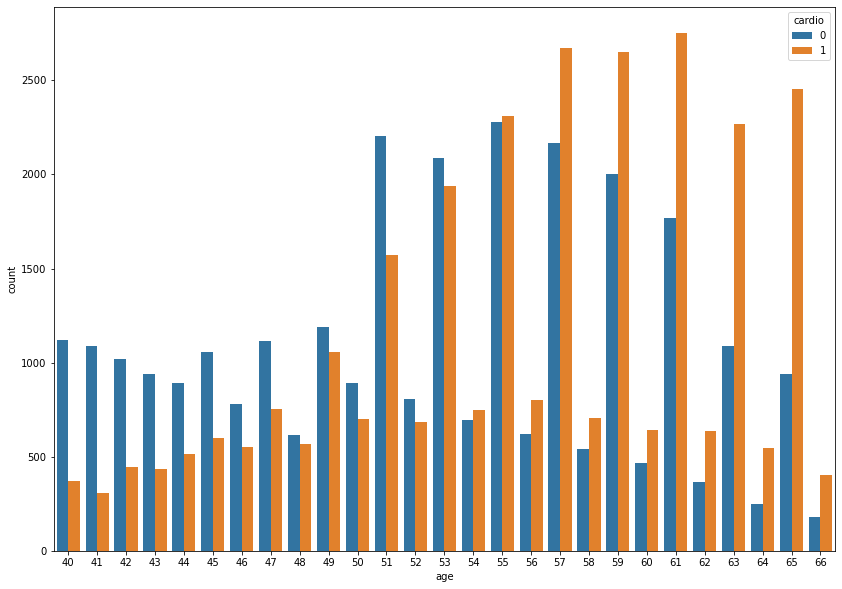

In [25]:
plt.figure(figsize=(14,10))
df['years'] = (df['age']).round().astype('int')
sns.countplot(x='age', hue='cardio', data = df);

In [26]:
age = df.query('cardio == 0')['age'].value_counts(ascending=False)
age

55    2277
51    2206
57    2168
53    2088
59    2003
61    1769
49    1190
40    1122
47    1116
63    1087
41    1087
45    1055
42    1018
65     941
43     937
44     892
50     892
52     807
46     778
54     696
56     623
48     613
58     539
60     469
62     365
64     250
66     177
Name: age, dtype: int64

In [27]:
df.query('age == 64')['cardio'].value_counts()

1    548
0    250
Name: cardio, dtype: int64

## 3 - 30% dos pacientes acima de 65 anos possuem colesterol acima do normal.

**Falso**. Os pacientes acima de 65 anos de idade com colesterol acima do normal representam 24%.

In [28]:
chl = df.query('age > 65')['cholesterol'].value_counts()
chl

normal               438
above normal          73
well above normal     67
Name: cholesterol, dtype: int64

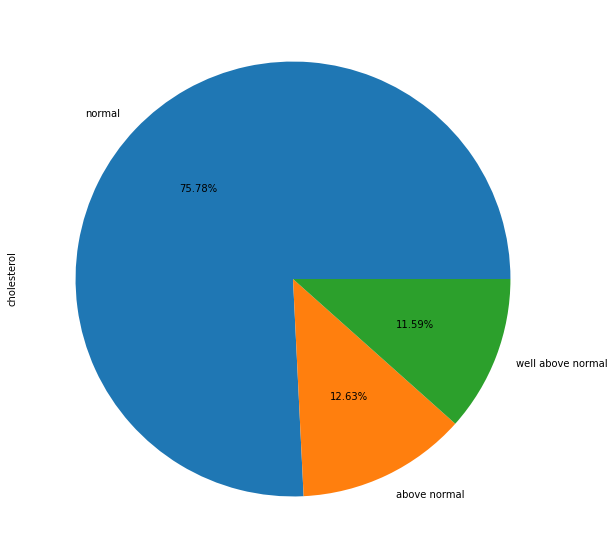

In [29]:
chl.plot.pie(autopct='%1.2f%%', figsize=(14,10));

## 4 - Todos os pacientes com pressões sistólica e diastólica normais não possuem doença cardíaca.

**Falso**. 24% dos pacientes com pressão sistólica abaixo dos 120 mmHg (de acordo com a tabela) possuem doença cardíaca, enquanto 29% dos pacientes com pressão diastólica abaixo dos 80mmHg possuem doença cardíaca.

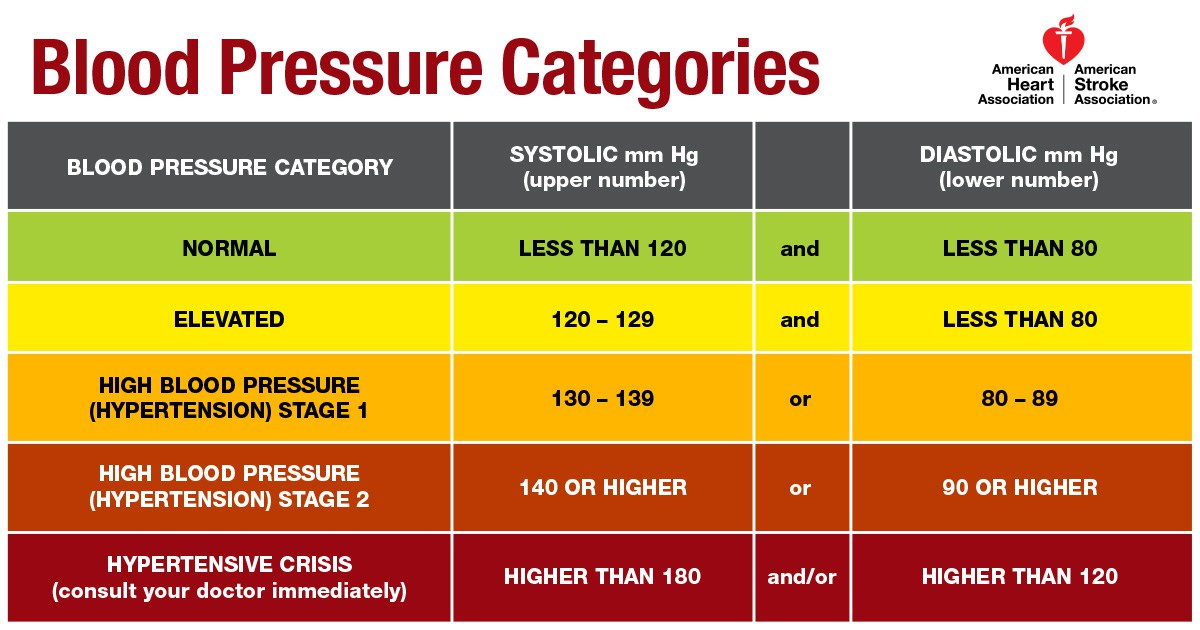

In [30]:
from IPython.display import Image
Image("BloodPressure.jpg")

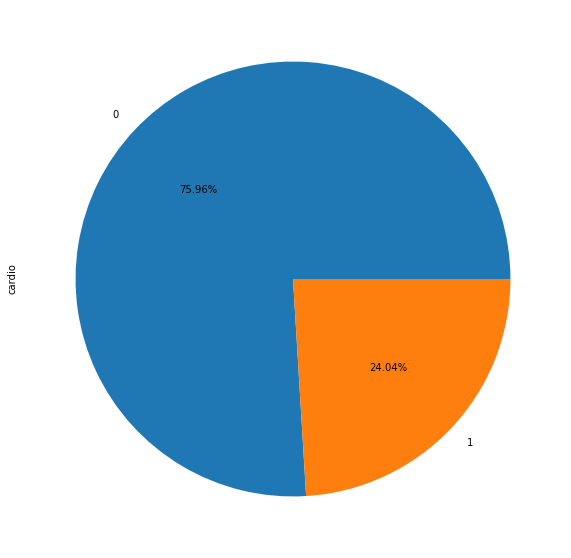

In [31]:
#Calculando a porcentagem sistólica
sis = df.query('ap_hi < 120')['cardio'].value_counts()
sis.plot.pie(autopct='%1.2f%%', figsize=(14,10));

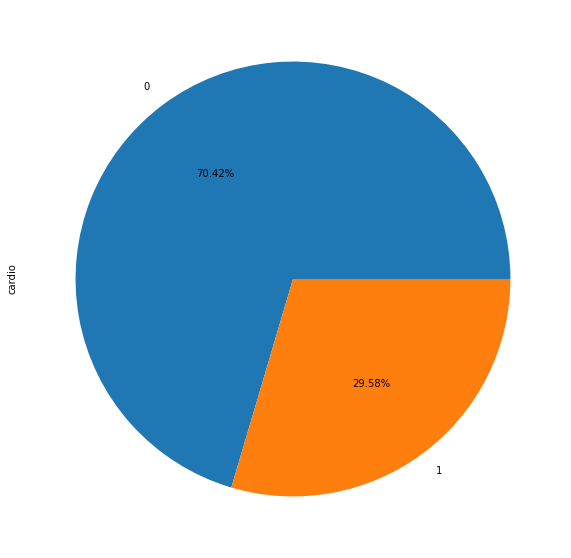

In [32]:
#Calculando a porcentagem diastólica
dis = df.query('ap_lo < 80')['cardio'].value_counts()
dis.plot.pie(autopct='%1.2f%%', figsize=(14,10));

## 5 - Pessoas que praticam exercícios não possuem doenças cardíacas.

**Falso**. 39,89% dos pacientes que possuem doença cardíaca praticam atividades físicas. 39,80% dos pacientes que não possuem doenças cardíacas praticam atividades físicas. O dataset está balanceado e há pouca diferença entre os que praticam e os que não praticam.

* Presence or absence of cardiovascular disease | 0: No cardiac disease, 1: Cardiac disease

In [33]:
active = df.groupby('cardio')['active'].value_counts()
active

cardio  active
0       Yes       23582
        No         5583
1       Yes       23635
        No         6450
Name: active, dtype: int64

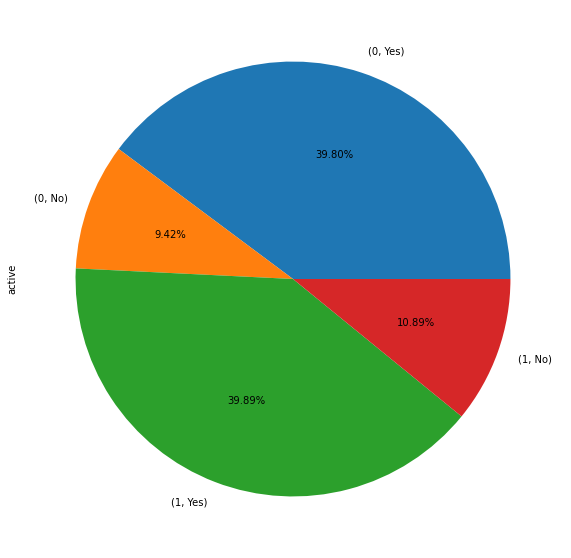

In [34]:
active.plot.pie(autopct='%1.2f%%', figsize=(14,10));

## Conclusão

* Os fatores que causam doenças cardíacas são diversas, desde má alimentação até falta de prática de exercícios físicos.
* O dataset está balanceado entre os que possuem e os que não possuem doença cardíaca.
* Apesar de muitos pacientes possuírem hábitos saudáveis, alguns possuem doenças cardíacas. O que faltou ser inserido no dataset é se o paciente tem histórico de familiares com problemas cardíacos, o que pode influenciar nos diagnósticos.